## The files contain one message per line. Each line is composed by two columns: one contains the label (spam or not spam) and another contains the raw text.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
spamclassifier_df = pd.read_csv("emails.csv")

In [8]:
spamclassifier_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [10]:
spamclassifier_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
fav = spamclassifier_df[spamclassifier_df['spam']==0]

In [20]:
spam = spamclassifier_df[spamclassifier_df['spam']==1]

In [22]:
fav

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [24]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamfav_countvectorizer = vectorizer.fit_transform(spamclassifier_df['text'])


In [28]:
print(spamfav_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
label = spamclassifier_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
X = spamfav_countvectorizer
y = label

In [38]:
X.shape

(5728, 37303)

In [40]:
y.shape

(5728,)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
#Import Class
from sklearn.naive_bayes import MultinomialNB
# Create an object
naive_classifier = MultinomialNB()
naive_classifier.fit(X_train, y_train)

MultinomialNB()

In [46]:
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
y_predict_train = naive_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

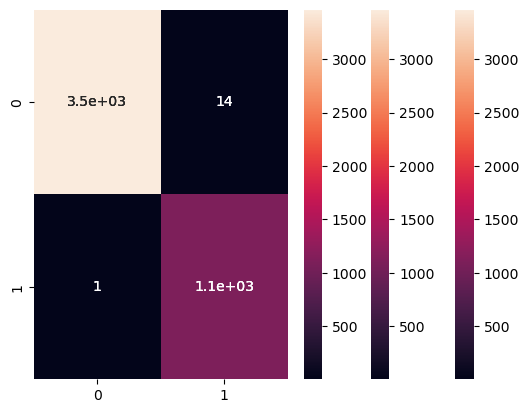

In [54]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)
plt.show()

In [58]:
# Predicting the Test set results
y_predict_test = naive_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)
plt.show

<Axes: >